In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import missingno as mano
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime, timedelta
from sklearn import preprocessing
#import pyodbc
from scipy.stats import normaltest, shapiro, chisquare, kstest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, log_loss, mean_absolute_error, mean_squared_error, r2_score

In [10]:
import pymc3 as pm
import arviz as az

In [27]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML project/df1_encoded.csv')

In [ ]:
df.head()

In [28]:
df1=df.iloc[:,1:]

In [29]:
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957.0,2,4,58138.0,0,0,2,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954.0,2,4,46344.0,1,1,20,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965.0,2,5,71613.0,0,0,13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984.0,2,5,26646.0,1,0,19,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981.0,4,3,58293.0,1,0,18,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [18]:
# random forest feature selection function to be used to filter important features 
def RFFS(df,trees,label,random=None,classification=True):
    P=df.drop([label],axis=1)
    L=df[label]
    x_train, x_test, y_train, y_test = train_test_split(P,L,test_size=0.2,random_state=42)
    if classification == False:
        model=RandomForestRegressor(n_estimators=trees,random_state=random)
    else:
        model = RandomForestClassifier(n_estimators = trees,random_state=random)
    model.fit(x_train,y_train)
    res = pd.Series(model.feature_importances_, index=x_train.columns.values).sort_values(ascending=False)*100
    print(res)
    return res

In [19]:
RFFS(df1,8,'Response')

Recency                12.052233
MntWines                6.703259
Income                  6.484310
Dt_Customer             6.049666
AcceptedCmp1            5.455204
NumWebVisitsMonth       5.165691
MntMeatProducts         5.157686
MntGoldProds            4.883489
AcceptedCmp5            4.805716
AcceptedCmp3            4.628865
MntSweetProducts        4.344075
MntFishProducts         4.276236
NumCatalogPurchases     4.226643
NumWebPurchases         3.876738
NumStorePurchases       3.733241
Year_Birth              3.281065
MntFruits               3.234577
NumDealsPurchases       3.177829
Education               2.832241
Marital_Status          2.552777
Teenhome                1.364080
AcceptedCmp2            0.639747
AcceptedCmp4            0.488929
Kidhome                 0.333955
Complain                0.251748
Z_CostContact           0.000000
Z_Revenue               0.000000
dtype: float64


Recency                12.052233
MntWines                6.703259
Income                  6.484310
Dt_Customer             6.049666
AcceptedCmp1            5.455204
NumWebVisitsMonth       5.165691
MntMeatProducts         5.157686
MntGoldProds            4.883489
AcceptedCmp5            4.805716
AcceptedCmp3            4.628865
MntSweetProducts        4.344075
MntFishProducts         4.276236
NumCatalogPurchases     4.226643
NumWebPurchases         3.876738
NumStorePurchases       3.733241
Year_Birth              3.281065
MntFruits               3.234577
NumDealsPurchases       3.177829
Education               2.832241
Marital_Status          2.552777
Teenhome                1.364080
AcceptedCmp2            0.639747
AcceptedCmp4            0.488929
Kidhome                 0.333955
Complain                0.251748
Z_CostContact           0.000000
Z_Revenue               0.000000
dtype: float64

KeyboardInterrupt: ignored

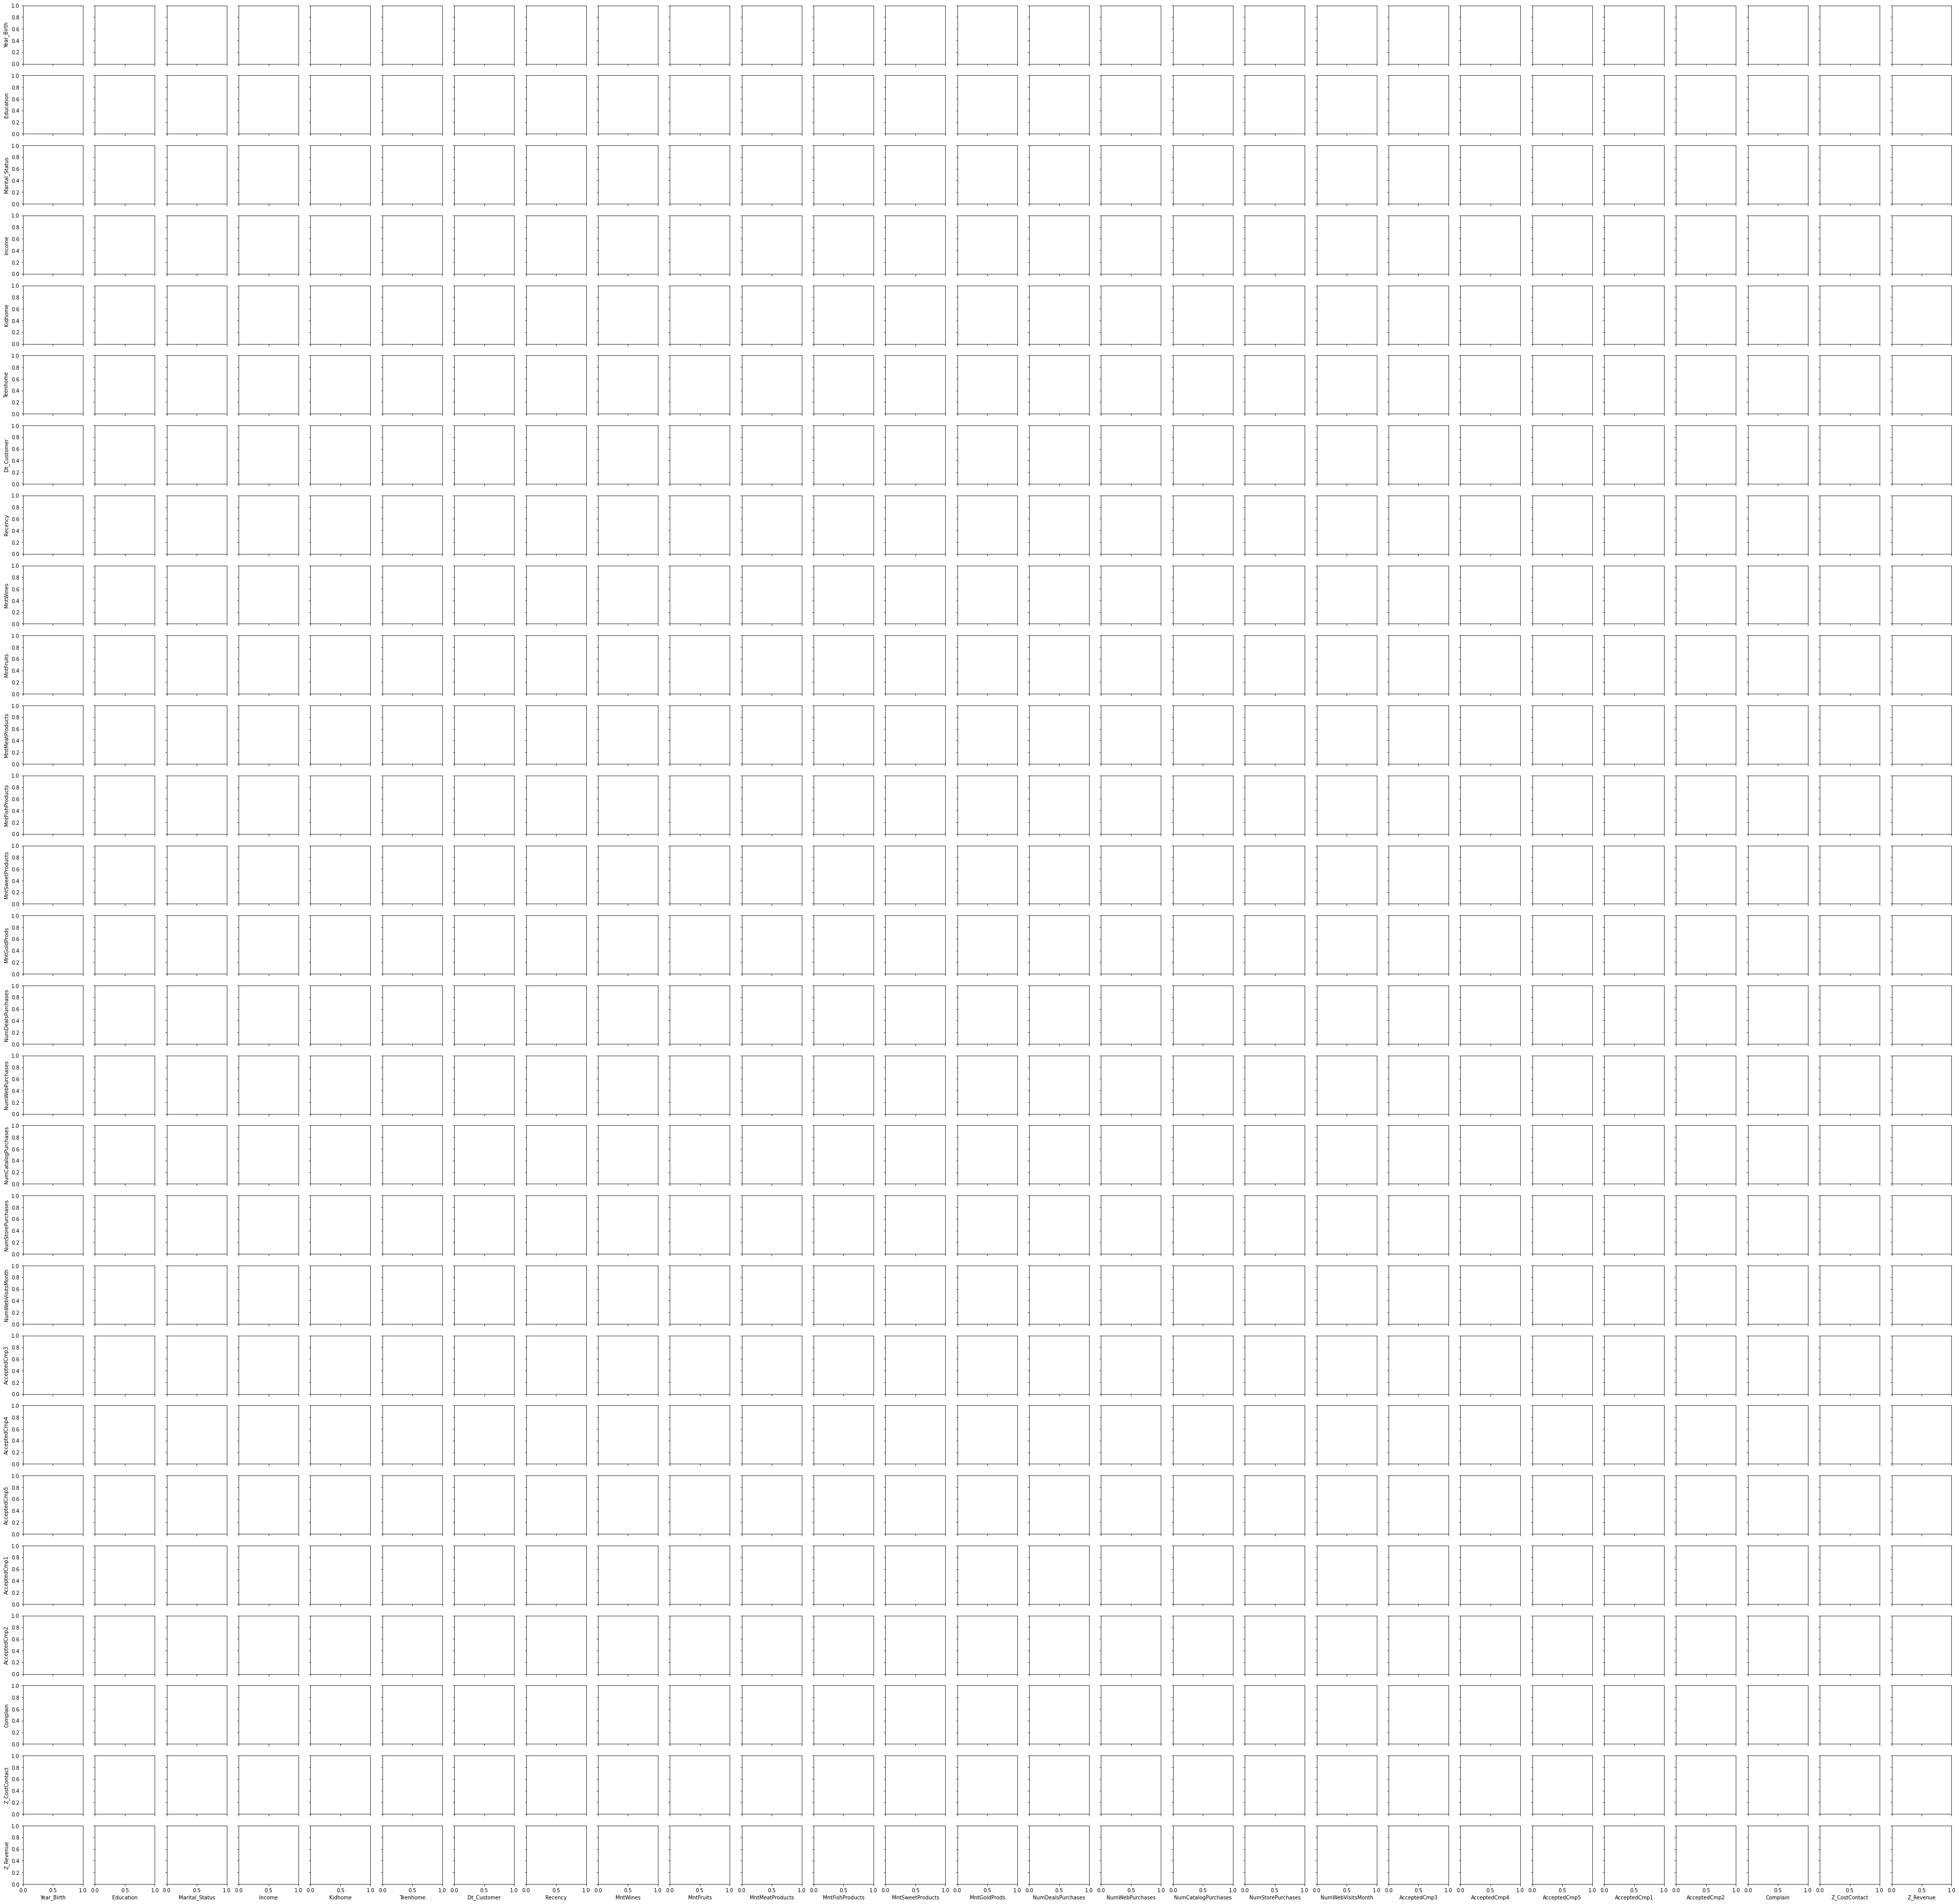

In [10]:
sns.pairplot(df1, hue='Response', diag_kind='kde')

In [20]:
#here
y_0 = pd.Categorical(df1['Response']).codes
x_n = 'Income'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

In [21]:
x_c_train, x_c_test, y_0_train, y_0_test=train_test_split(x_c,y_0,test_size=0.35)

In [22]:
with pm.Model() as model_0:
    x_c_train = pm.Data('x', x_c_train)
    y_0_train = pm.Data('y', y_0_train)
    
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + pm.math.dot(x_c_train, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0_train)
    trace_0 = pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 41 seconds.


In [23]:
az.summary(trace_0, var_names=['β','α'])


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β,0.000,0.000,0.000,0.000,0.000,0.000,1256.0,1161.0,1.00
α,-1.742,0.077,-1.879,-1.597,0.002,0.001,1506.0,1555.0,1.01


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26e32b85d0>,
      dtype=object)

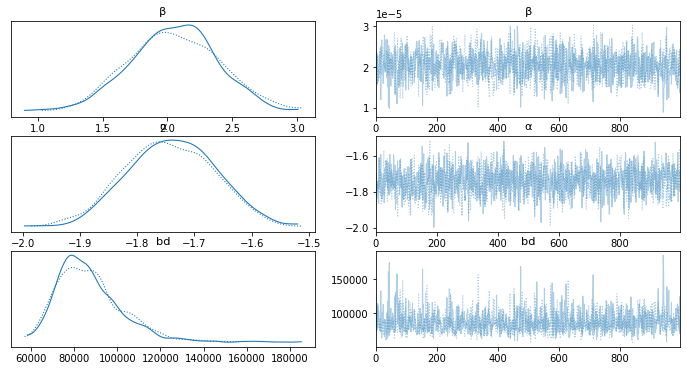

In [24]:
az.plot_trace(trace_0,var_names=['β','α','bd'])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1459) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26e2489350>,
      dtype=object)

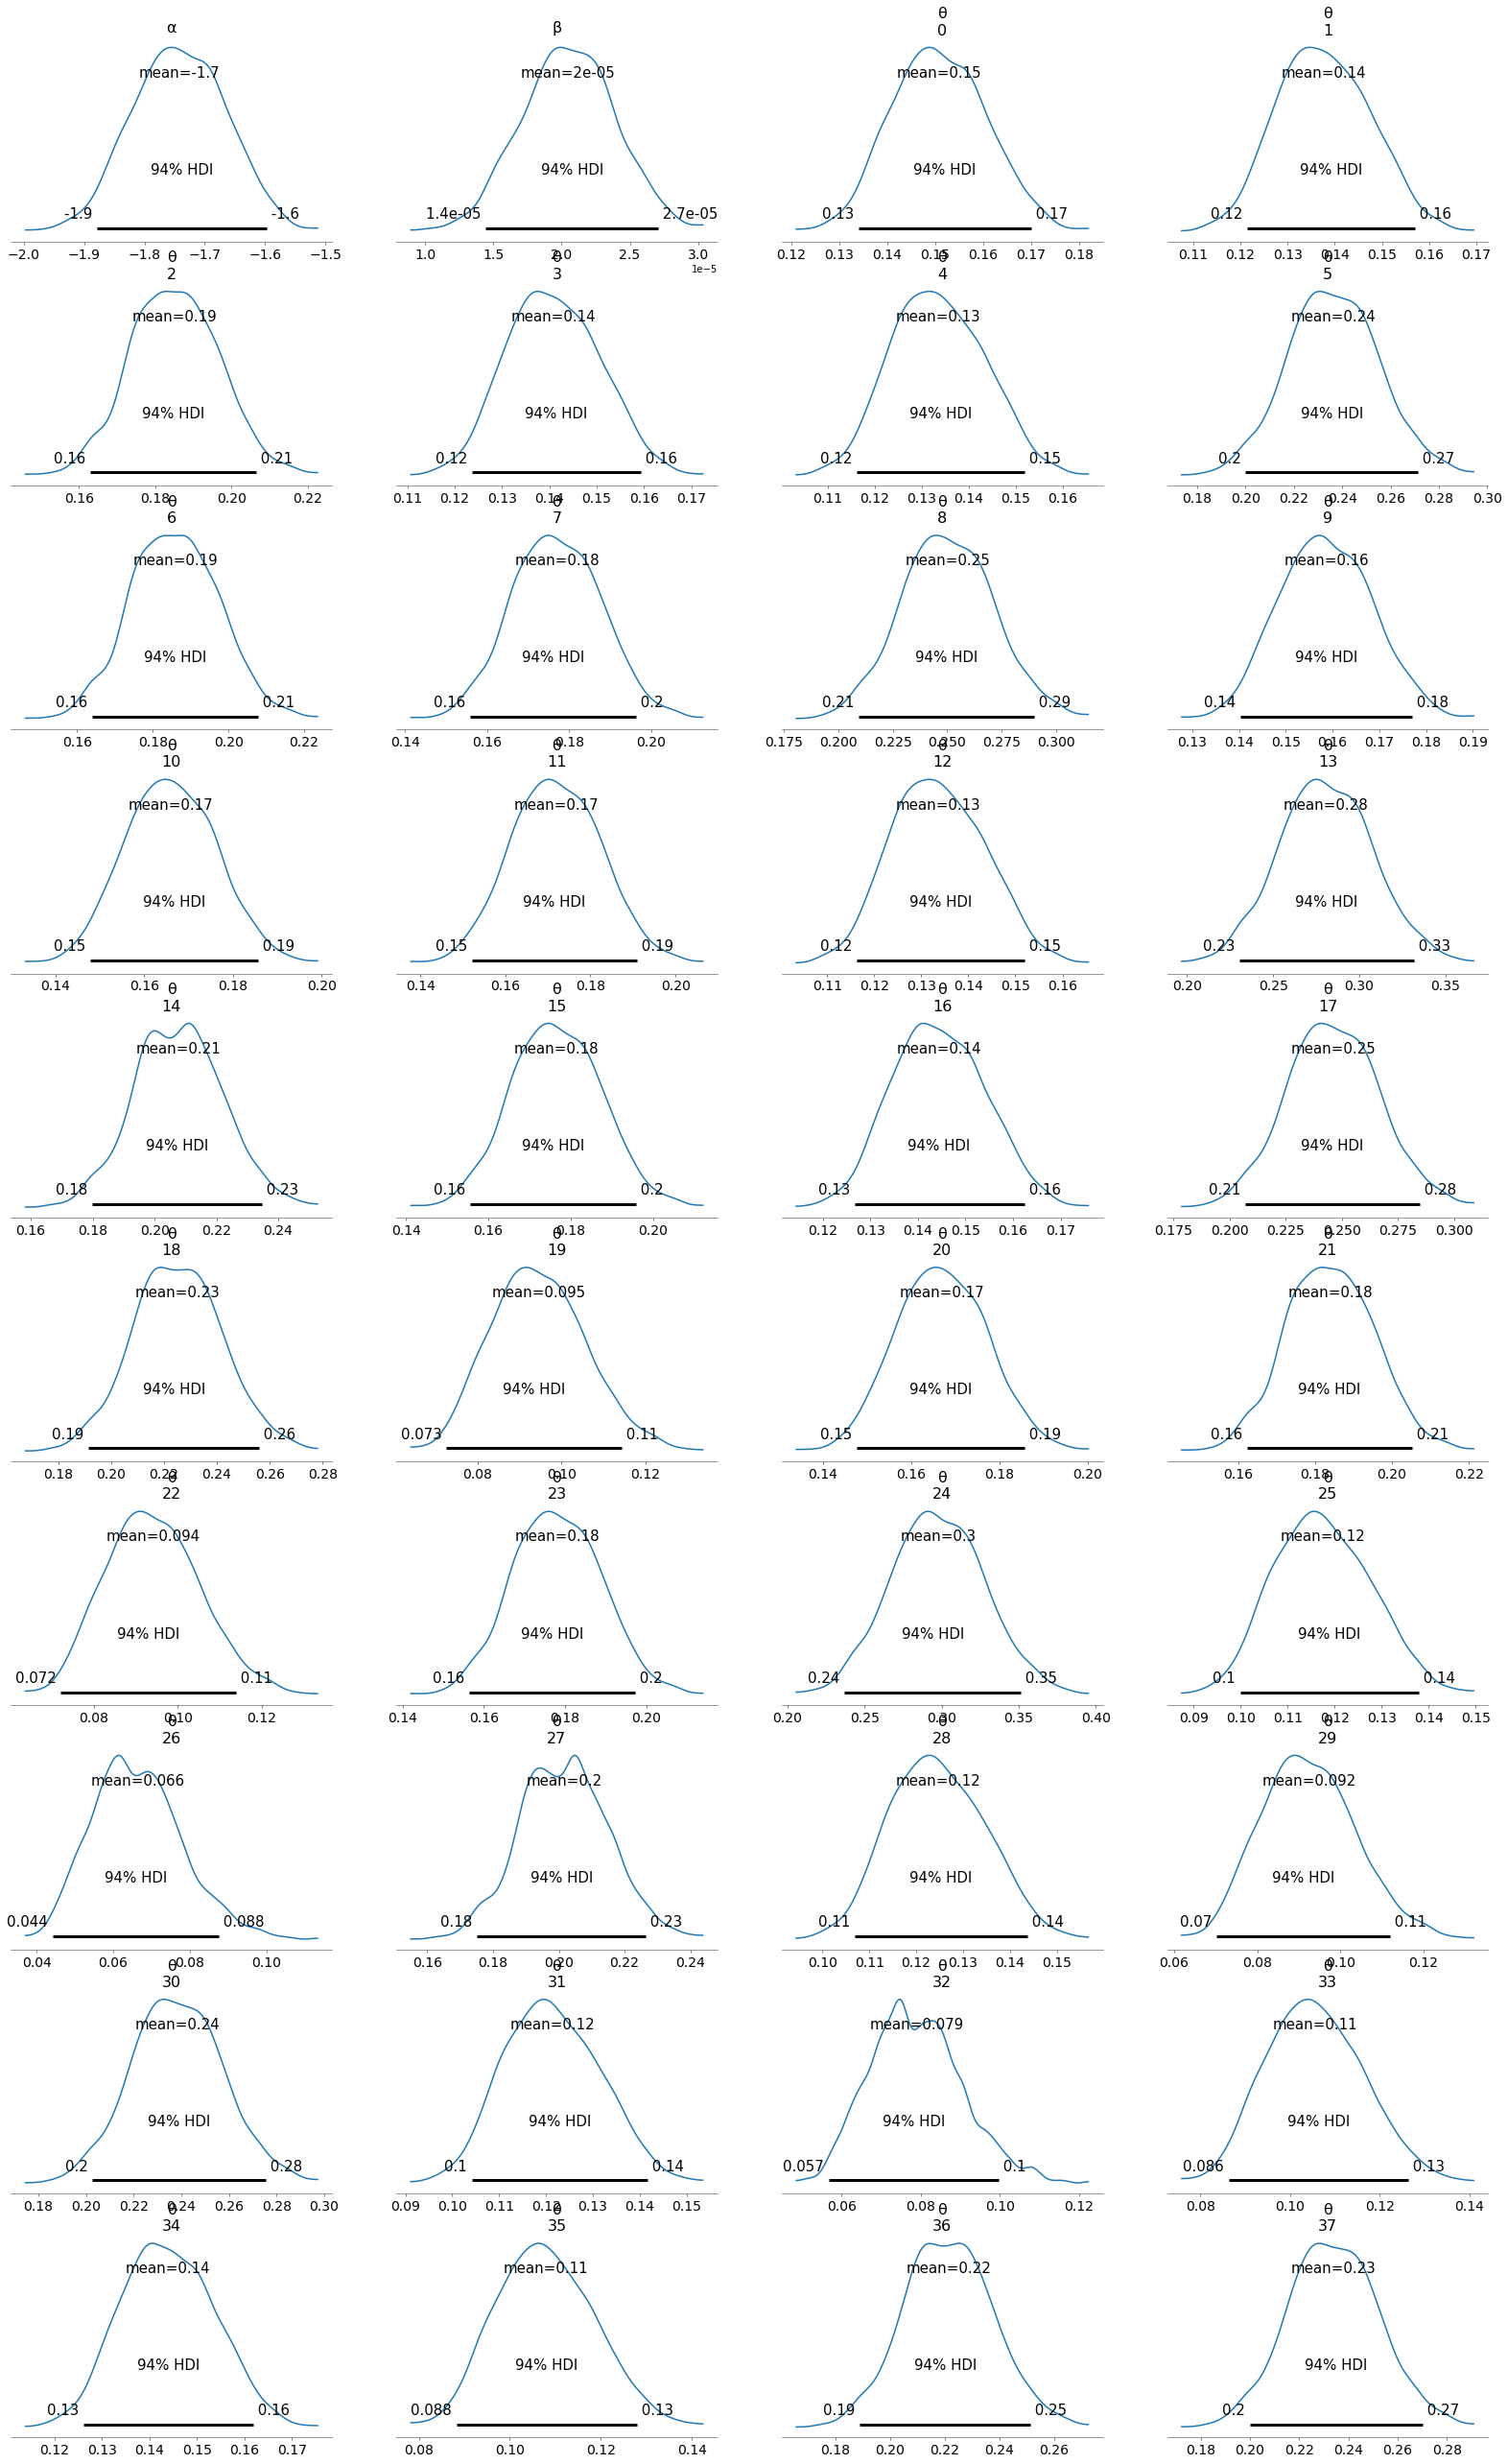

In [25]:
az.plot_posterior(trace_0)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


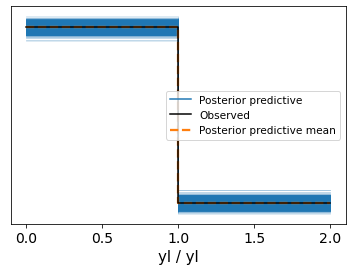

In [30]:
prior_predictive = pm.sample_prior_predictive(model=model_0)

posterior_predictive = pm.sample_posterior_predictive(model=model_0,trace=trace_0)
dataset = az.from_pymc3(trace=trace_0, posterior_predictive=posterior_predictive,prior=prior_predictive)
az.plot_ppc(dataset);


In [31]:
with model_0:
  pm.set_data({'x': x_c_test})
  y_pred = pm.sample_posterior_predictive(trace_0)

In [32]:
y_pred

{'yl': array([[0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]])}

In [33]:
predictions=y_pred['yl'].mean(axis=0)
predictions

array([0.101 , 0.12  , 0.142 , 0.1955, 0.1085, 0.1625, 0.087 , 0.139 ,
       0.1055, 0.127 , 0.092 , 0.179 , 0.14  , 0.144 , 0.233 , 0.2225,
       0.083 , 0.1145, 0.2055, 0.1735, 0.262 , 0.1385, 0.2035, 0.1485,
       0.231 , 0.1785, 0.082 , 0.1075, 0.0835, 0.205 , 0.108 , 0.1935,
       0.159 , 0.115 , 0.1515, 0.086 , 0.0855, 0.084 , 0.0815, 0.146 ,
       0.1825, 0.202 , 0.1335, 0.204 , 0.107 , 0.238 , 0.244 , 0.234 ,
       0.1165, 0.153 , 0.082 , 0.152 , 0.0785, 0.1615, 0.125 , 0.2585,
       0.2225, 0.122 , 0.125 , 0.1175, 0.104 , 0.129 , 0.1025, 0.2015,
       0.1705, 0.145 , 0.093 , 0.1405, 0.09  , 0.2555, 0.185 , 0.0865,
       0.091 , 0.1495, 0.17  , 0.076 , 0.184 , 0.1085, 0.0895, 0.1905,
       0.1995, 0.2435, 0.2395, 0.136 , 0.086 , 0.123 , 0.1035, 0.2025,
       0.219 , 0.182 , 0.093 , 0.1785, 0.218 , 0.089 , 0.256 , 0.1775,
       0.176 , 0.1485, 0.24  , 0.089 , 0.1425, 0.1865, 0.1465, 0.108 ,
       0.099 , 0.1135, 0.1185, 0.1385, 0.1855, 0.157 , 0.0845, 0.152 ,
      

In [36]:
predictions2=[]
for i in predictions:
  if i>0.5:
    predictions2.append(1)
  else:
    predictions2.append(0)
predictions2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [37]:
z=0
o=0
for i in predictions2:
  if i==0:
    z=z+1
  elif i==1:
    o=o+1
print(z)
print(o)


780
4


In [38]:
accuracy=accuracy_score(y_0_test,predictions2)*100
precision=precision_score(y_0_test,predictions2)*100
recall=recall_score(y_0_test,predictions2)*100
f1score=f1_score(y_0_test,predictions2)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  86.22448979591837
Precision =  0.0
Recall =  0.0
F1 score =  0.0


Out of 784 predicted values, only 4 ones have been generated and the accuracy score shows even they are predicted wrongly. Let's try changing the thresholds using ROCAUC curve and see if it improves the F1 score

In [39]:
def tp_fp(y_pred, th):
    y_pred1=[]
    #y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), dtype='category')
    y_pred=list(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>=th:
            y_pred1.append(1)
        else:
            y_pred1.append(0)
    tn,fp,fn,tp=confusion_matrix(y_0_test, y_pred1).ravel()
    return tp,fp

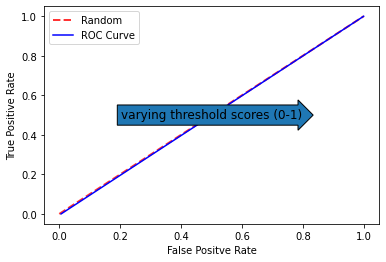

0.0

In [40]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

tpr=[]
fpr=[]

positives = np.sum(y_0_test==1)
negatives = np.sum(y_0_test==0)

for t in thresholds:
    tp, fp=tp_fp(predictions2,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Checking AUC score

auc_score = roc_auc_score(y_0_test, predictions2)
auc_score

tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
#print('At index:',index)
#print('geometric mean is: ',gmean[index])

# optimal threshold
thresholds[index] # threshold of 0.2 will give us the highest mean and best tpr to fpr ratio





In [41]:
y_pred=list(predictions2)
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.1:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [42]:
accuracy=accuracy_score(y_0_test,y_pred1)*100
precision=precision_score(y_0_test,y_pred1)*100
recall=recall_score(y_0_test,y_pred1)*100
f1score=f1_score(y_0_test,y_pred1)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  86.22448979591837
Precision =  0.0
Recall =  0.0
F1 score =  0.0


No effect on the f1 score. It is possible that the MCMC model only learned the classes with 0 labels more effeciently. We will try adding another feature in the MCMC model for better learning and observe the results.

In [43]:
#here
y_0 = pd.Categorical(df1['Response']).codes
x_n = 'Income'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

In [44]:
x_c_train, x_c_test, y_0_train, y_0_test=train_test_split(x_c,y_0,test_size=0.35)

In [45]:
with pm.Model() as model_0:
    x_c_train = pm.Data('x', x_c_train)
    y_0_train = pm.Data('y', y_0_train)
    
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + pm.math.dot(x_c_train, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    step1=pm.Metropolis()
    yl = pm.Bernoulli('yl', p=θ, observed=y_0_train)
    trace_0 = pm.sample(1000, step=step1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [β]
>Metropolis: [α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [46]:
az.summary(trace_0, var_names=['β','α'])


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β,-1.895,9.188,-18.744,16.638,1.975,1.416,22.0,63.0,1.10
α,-0.307,8.322,-15.408,16.324,2.098,1.512,13.0,120.0,1.12


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f38be850>,
      dtype=object)

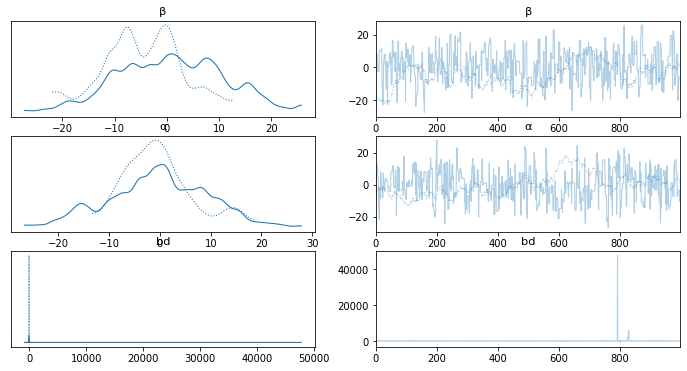

In [47]:
az.plot_trace(trace_0,var_names=['β','α','bd'])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1459) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f4cb58d0>,
      dtype=object)

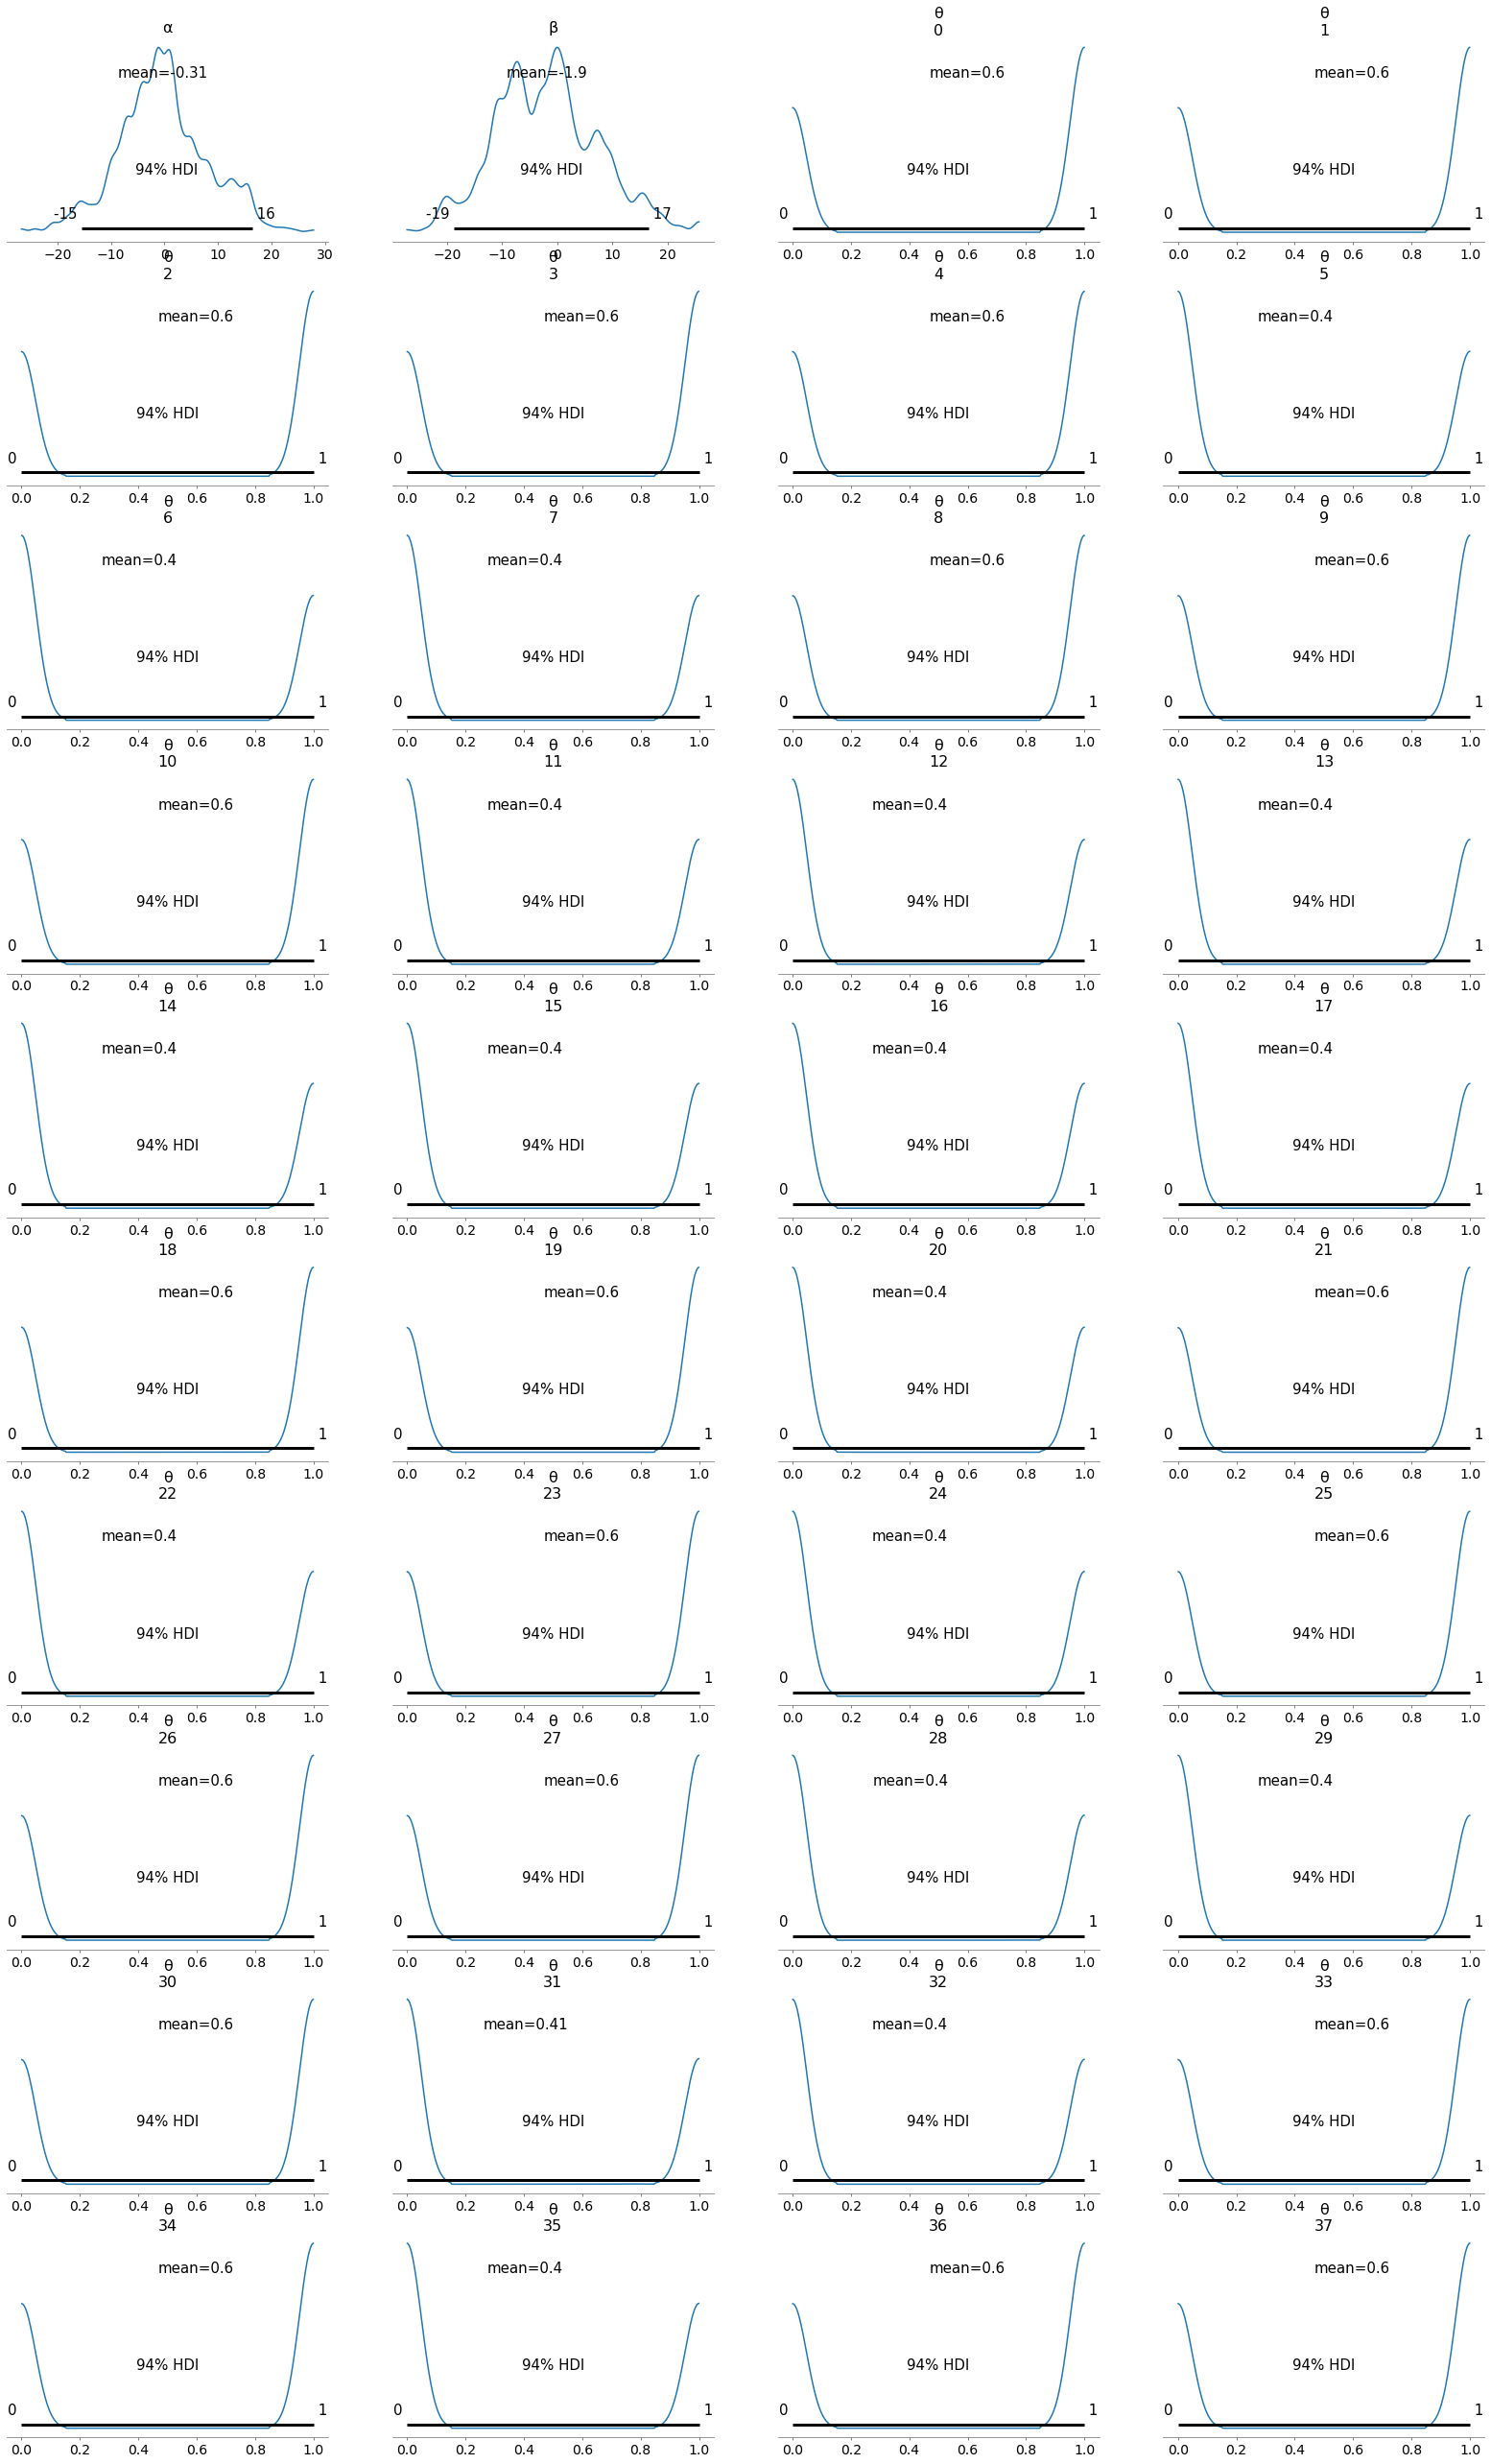

In [48]:
az.plot_posterior(trace_0)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


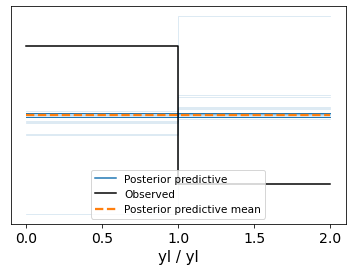

In [49]:
prior_predictive = pm.sample_prior_predictive(model=model_0)

posterior_predictive = pm.sample_posterior_predictive(model=model_0,trace=trace_0)
dataset = az.from_pymc3(trace=trace_0, posterior_predictive=posterior_predictive,prior=prior_predictive)
az.plot_ppc(dataset);


In [50]:
with model_0:
  pm.set_data({'x': x_c_test})
  y_pred = pm.sample_posterior_predictive(trace_0)

In [51]:
y_pred

{'yl': array([[1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0]])}

In [52]:
predictions=y_pred['yl'].mean(axis=0)
predictions

array([0.403 , 0.403 , 0.5975, 0.5975, 0.5975, 0.404 , 0.5975, 0.403 ,
       0.5975, 0.404 , 0.5975, 0.5975, 0.5975, 0.5975, 0.5975, 0.403 ,
       0.5975, 0.5975, 0.5975, 0.403 , 0.5975, 0.5975, 0.403 , 0.403 ,
       0.403 , 0.403 , 0.403 , 0.5975, 0.5975, 0.5975, 0.5975, 0.405 ,
       0.403 , 0.403 , 0.5975, 0.597 , 0.403 , 0.5975, 0.403 , 0.404 ,
       0.403 , 0.403 , 0.403 , 0.5975, 0.5975, 0.5975, 0.5975, 0.403 ,
       0.4045, 0.5975, 0.403 , 0.5975, 0.403 , 0.403 , 0.5975, 0.403 ,
       0.5975, 0.5975, 0.5975, 0.5975, 0.403 , 0.5975, 0.405 , 0.5975,
       0.5975, 0.4025, 0.403 , 0.405 , 0.403 , 0.403 , 0.4055, 0.5975,
       0.5975, 0.403 , 0.4035, 0.5975, 0.403 , 0.5975, 0.5975, 0.5975,
       0.403 , 0.405 , 0.4035, 0.403 , 0.5975, 0.403 , 0.403 , 0.5975,
       0.5975, 0.403 , 0.403 , 0.403 , 0.403 , 0.5975, 0.403 , 0.5975,
       0.5975, 0.5975, 0.5975, 0.5975, 0.5975, 0.5975, 0.5975, 0.403 ,
       0.5975, 0.5975, 0.5975, 0.4035, 0.4045, 0.403 , 0.403 , 0.403 ,
      

In [53]:
predictions2=[]
for i in predictions:
  if i>0.5:
    predictions2.append(1)
  else:
    predictions2.append(0)
predictions2

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [54]:
z=0
o=0
for i in predictions2:
  if i==0:
    z=z+1
  elif i==1:
    o=o+1
print(z)
print(o)


389
395


In [55]:
accuracy=accuracy_score(y_0_test,predictions2)*100
precision=precision_score(y_0_test,predictions2)*100
recall=recall_score(y_0_test,predictions2)*100
f1score=f1_score(y_0_test,predictions2)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  45.535714285714285
Precision =  9.620253164556962
Recall =  35.18518518518518
F1 score =  15.109343936381709



With MH algorithm, out of 784 predicted values, 395 ones were predicted, much more than NUTS. This helps improve the F1 score by a good margin. Let's try changing the thresholds using ROCAUC curve and see if it improves the F1 score

In [56]:
def tp_fp(y_pred, th):
    y_pred1=[]
    #y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), dtype='category')
    y_pred=list(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>=th:
            y_pred1.append(1)
        else:
            y_pred1.append(0)
    tn,fp,fn,tp=confusion_matrix(y_0_test, y_pred1).ravel()
    return tp,fp

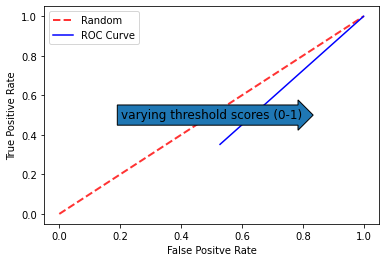

0.010101010101010102

In [57]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

tpr=[]
fpr=[]

positives = np.sum(y_0_test==1)
negatives = np.sum(y_0_test==0)

for t in thresholds:
    tp, fp=tp_fp(predictions2,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Checking AUC score

auc_score = roc_auc_score(y_0_test, predictions2)
auc_score

tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
#print('At index:',index)
#print('geometric mean is: ',gmean[index])

# optimal threshold
thresholds[index] # threshold of 0.2 will give us the highest mean and best tpr to fpr ratio





In [60]:
y_pred=list(predictions2)
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.4:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [59]:
accuracy=accuracy_score(y_0_test,y_pred1)*100
precision=precision_score(y_0_test,y_pred1)*100
recall=recall_score(y_0_test,y_pred1)*100
f1score=f1_score(y_0_test,y_pred1)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  45.535714285714285
Precision =  9.620253164556962
Recall =  35.18518518518518
F1 score =  15.109343936381709


No significant changes observed with ROCAUC method. Let's try including one more fearture and use Metrapolis Hastings algorithm

In [91]:
y_0 = pd.Categorical(df1['Response']).codes
x_n = ['Income','Recency']
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

In [92]:
x_c_train, x_c_test, y_0_train, y_0_test=train_test_split(x_c,y_0,test_size=0.35,stratify=y_0)

In [93]:
import theano
X_shared = theano.shared(x_c_train)

In [94]:
with pm.Model() as model_0:
  
  α = pm.Normal('α', mu=0, sd=10)
  β = pm.Normal('β', mu=0, sd=10,shape=len(x_n))
  μ = α + pm.math.dot(X_shared, β)
  θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
  bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * X_shared[:,0])
  #start=pm.find_MAP()
  step1=pm.NUTS()
  yl = pm.Bernoulli('yl', p=θ, observed=y_0_train)
  trace_0 = pm.sample(1000,step=step1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 8 seconds.


In [95]:
az.summary(trace_0, var_names=['β','α'])


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β[0],0.033,10.490,-19.249,20.529,0.212,0.262,2453.0,1409.0,1.0
β[1],-0.251,10.421,-18.987,19.775,0.211,0.243,2500.0,1458.0,1.0
α,0.406,9.750,-17.410,19.183,0.205,0.211,2273.0,1372.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f4ff6510>,
      dtype=object)

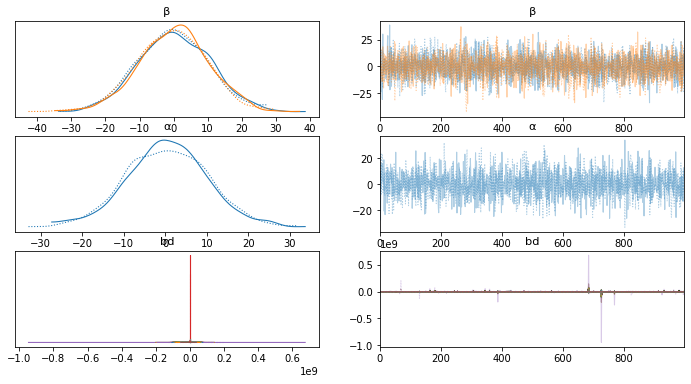

In [96]:
az.plot_trace(trace_0,var_names=['β','α','bd'])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (2915) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d17c0390>,
      dtype=object)

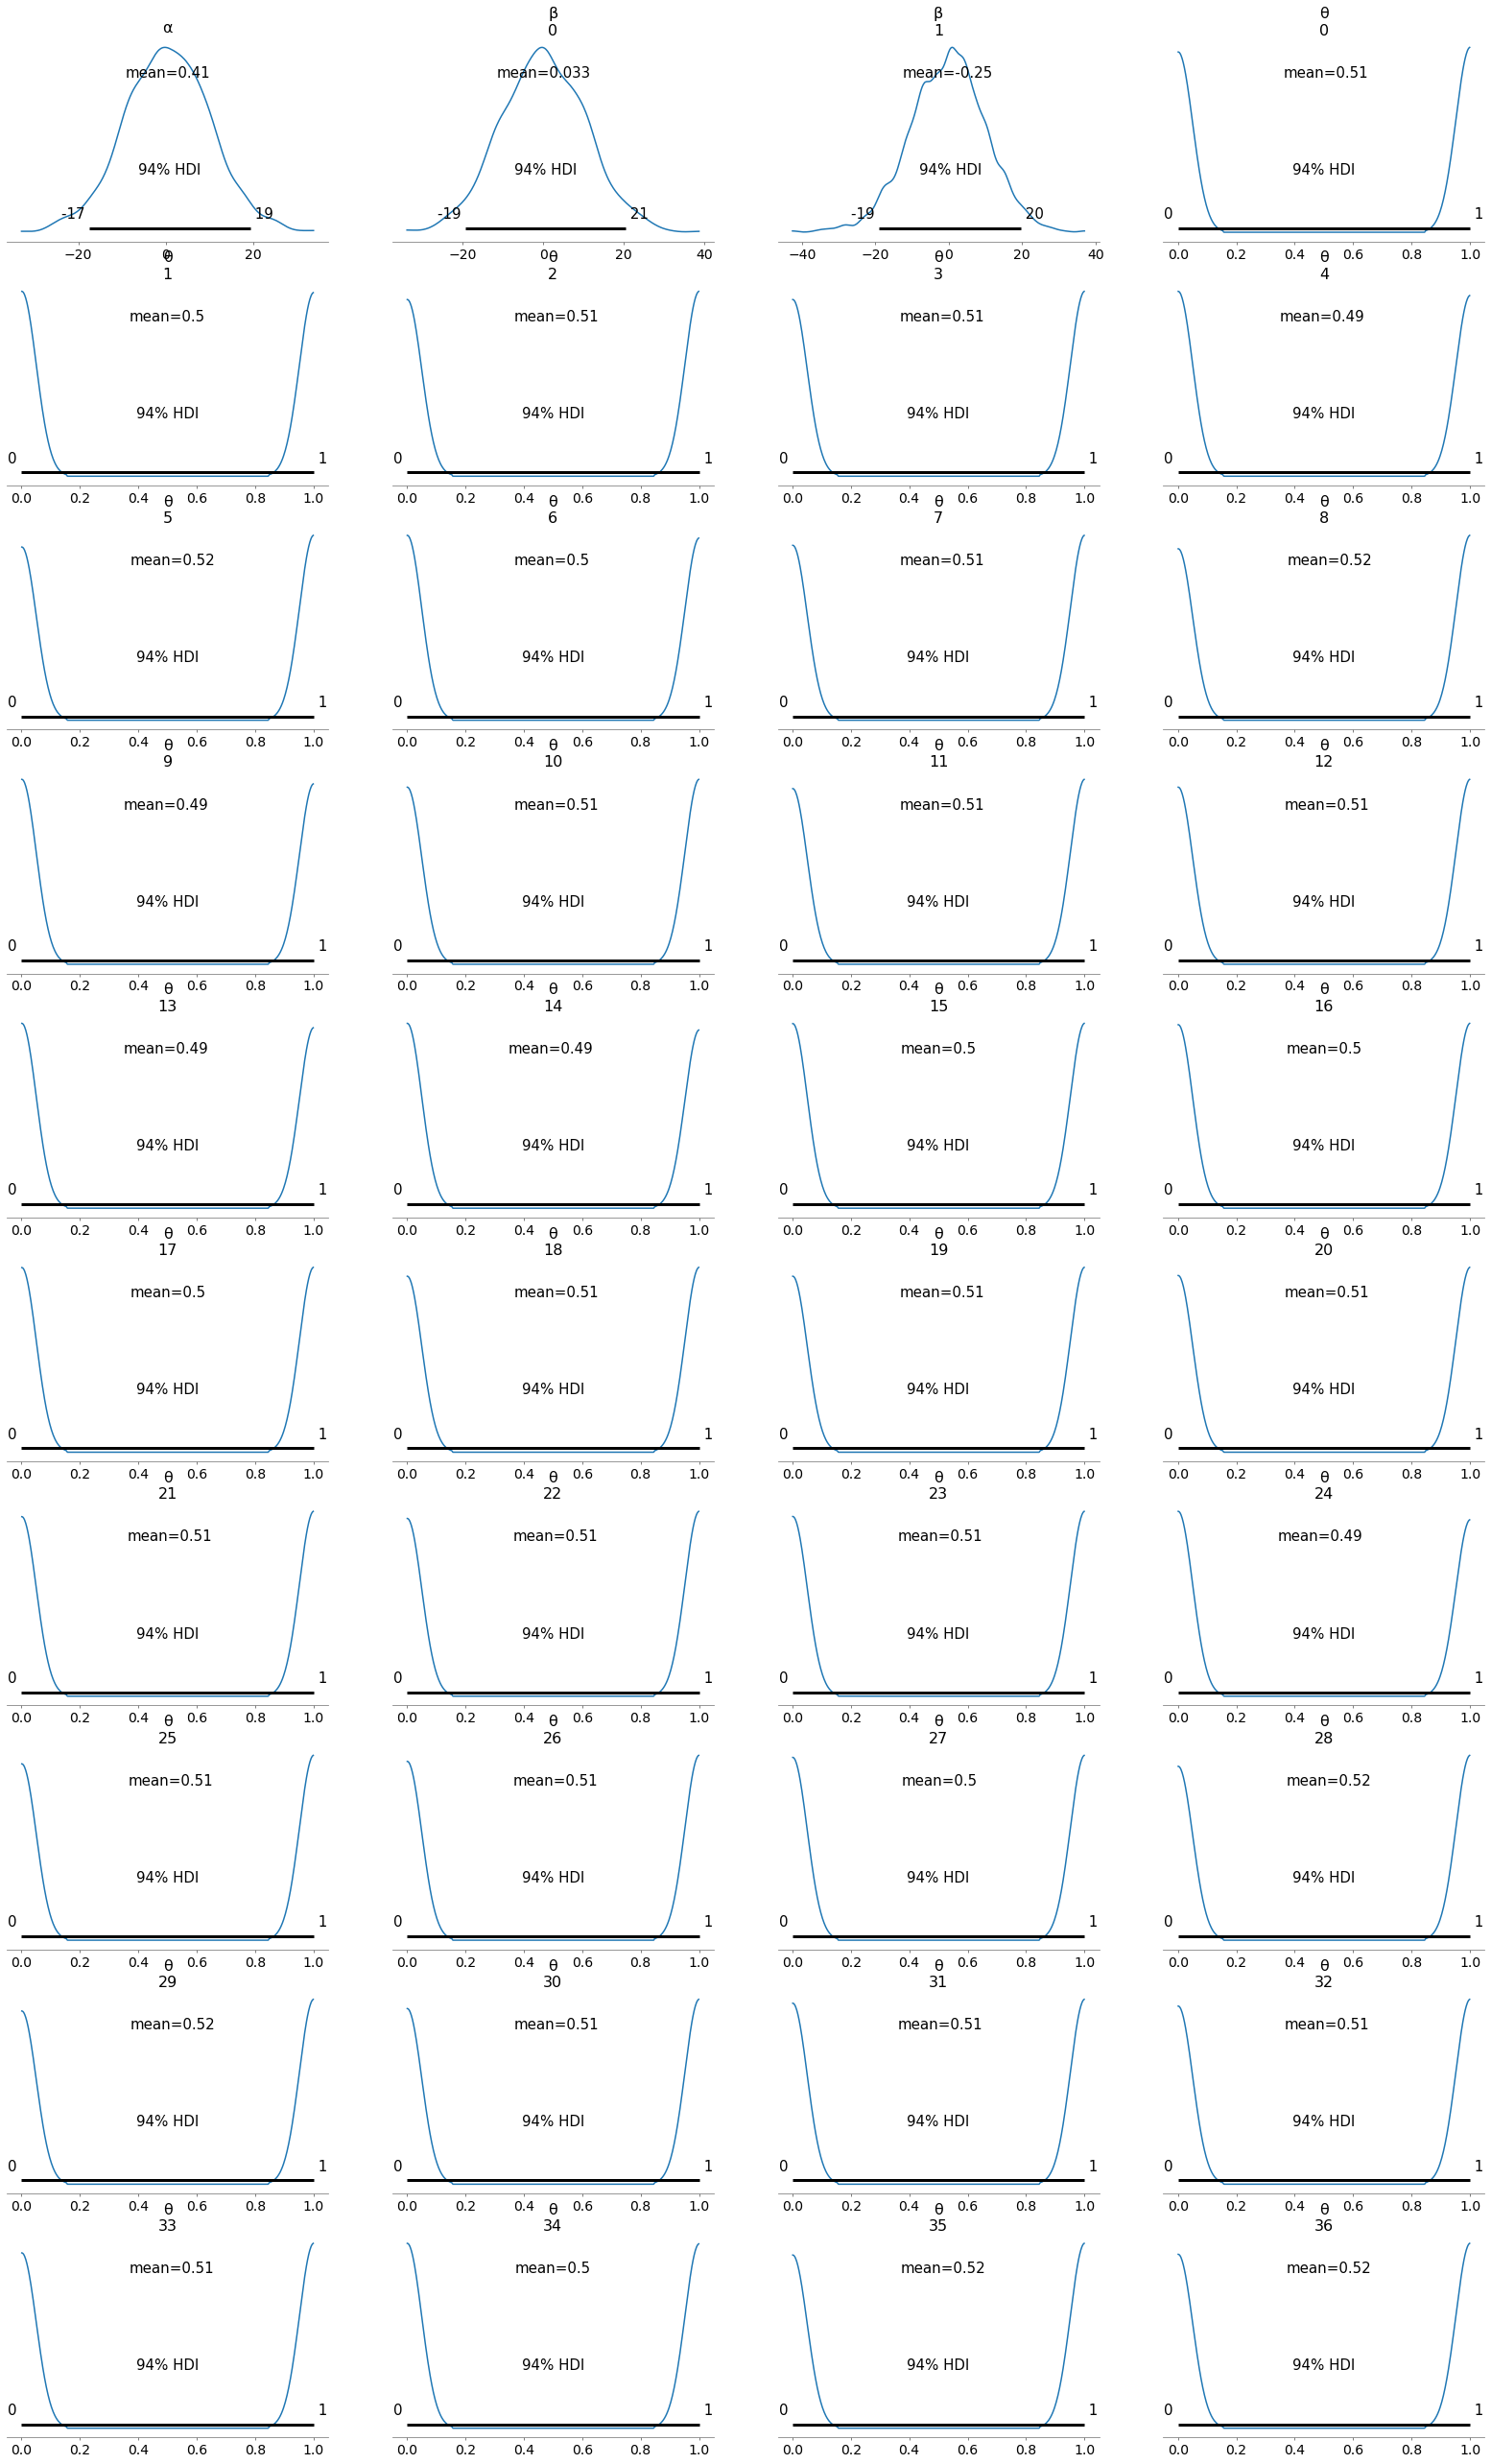

In [97]:
az.plot_posterior(trace_0)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


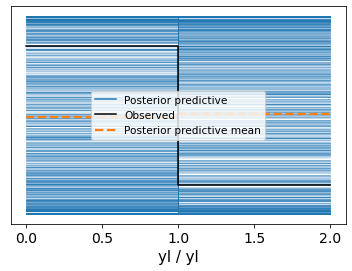

In [98]:
prior_predictive = pm.sample_prior_predictive(model=model_0)

posterior_predictive = pm.sample_posterior_predictive(model=model_0,trace=trace_0)
dataset = az.from_pymc3(trace=trace_0, posterior_predictive=posterior_predictive,prior=prior_predictive)
az.plot_ppc(dataset);


In [107]:
X_shared.set_value(x_c_test)
with model_0:
  #pm.set_data({'x': x_c_test})
  y_pred = pm.sample_posterior_predictive(trace_0)

In [108]:
y_pred

{'yl': array([[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1]])}

In [109]:
predictions=y_pred['yl'].mean(axis=0)
predictions

array([0.4955, 0.5125, 0.504 , 0.5035, 0.493 , 0.5015, 0.498 , 0.511 ,
       0.4915, 0.511 , 0.5175, 0.517 , 0.5035, 0.512 , 0.5185, 0.512 ,
       0.501 , 0.5045, 0.5115, 0.5005, 0.516 , 0.488 , 0.509 , 0.513 ,
       0.5135, 0.507 , 0.497 , 0.509 , 0.509 , 0.512 , 0.5085, 0.52  ,
       0.4915, 0.5095, 0.518 , 0.5105, 0.5175, 0.4985, 0.486 , 0.5075,
       0.516 , 0.5155, 0.5145, 0.508 , 0.518 , 0.5155, 0.511 , 0.5115,
       0.51  , 0.5165, 0.4955, 0.513 , 0.5085, 0.502 , 0.511 , 0.4955,
       0.502 , 0.5015, 0.5   , 0.5135, 0.5035, 0.512 , 0.5095, 0.5185,
       0.511 , 0.509 , 0.502 , 0.5165, 0.5145, 0.515 , 0.496 , 0.501 ,
       0.5105, 0.5125, 0.502 , 0.515 , 0.5145, 0.515 , 0.491 , 0.5125,
       0.5085, 0.513 , 0.513 , 0.495 , 0.489 , 0.5   , 0.5135, 0.517 ,
       0.5145, 0.5115, 0.5125, 0.519 , 0.511 , 0.515 , 0.4945, 0.5165,
       0.509 , 0.495 , 0.498 , 0.5075, 0.5155, 0.5185, 0.516 , 0.4945,
       0.496 , 0.5005, 0.502 , 0.5145, 0.49  , 0.5115, 0.497 , 0.498 ,
      

In [110]:
predictions2=[]
for i in predictions:
  if i>0.5:
    predictions2.append(1)
  else:
    predictions2.append(0)
predictions2

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [111]:
z=0
o=0
for i in predictions2:
  if i==0:
    z=z+1
  elif i==1:
    o=o+1
print(z)
print(o)


166
618


In [112]:
len(predictions2)

784

In [113]:
accuracy=accuracy_score(y_0_test,predictions2)*100
precision=precision_score(y_0_test,predictions2)*100
recall=recall_score(y_0_test,predictions2)*100
f1score=f1_score(y_0_test,predictions2)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  26.658163265306122
Precision =  12.944983818770226
Recall =  68.37606837606837
F1 score =  21.768707482993197


In [114]:
def tp_fp(y_pred, th):
    y_pred1=[]
    #y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), dtype='category')
    y_pred=list(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>=th:
            y_pred1.append(1)
        else:
            y_pred1.append(0)
    tn,fp,fn,tp=confusion_matrix(y_0_test, y_pred1).ravel()
    return tp,fp

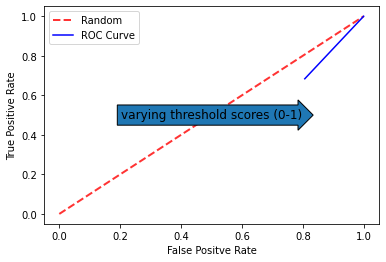

0.010101010101010102

In [115]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

tpr=[]
fpr=[]

positives = np.sum(y_0_test==1)
negatives = np.sum(y_0_test==0)

for t in thresholds:
    tp, fp=tp_fp(predictions2,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Checking AUC score

auc_score = roc_auc_score(y_0_test, predictions2)
auc_score

tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
#print('At index:',index)
#print('geometric mean is: ',gmean[index])

# optimal threshold
thresholds[index] # threshold of 0.2 will give us the highest mean and best tpr to fpr ratio





In [118]:
y_pred=list(predictions2)
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.2:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [119]:
accuracy=accuracy_score(y_0_test,y_pred1)*100
precision=precision_score(y_0_test,y_pred1)*100
recall=recall_score(y_0_test,y_pred1)*100
f1score=f1_score(y_0_test,y_pred1)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  26.658163265306122
Precision =  12.944983818770226
Recall =  68.37606837606837
F1 score =  21.768707482993197


This dataset is highly unbalanced in terms of classes. We are using sigmoid to find theta values and logistic regression can struggle sometimes with unbalanced classes. Theta is further used to find decision boundary. When classes are unbalanced, the boundary will tend more towards the class with higher frequency. In order to solve that, let's try and use softmax function instead of sigmoid.

In [120]:
y_0 = pd.Categorical(df1['Response']).codes
x_n = ['Income','Recency']
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

In [121]:
x_c_train, x_c_test, y_0_train, y_0_test=train_test_split(x_c,y_0,test_size=0.35,stratify=y_0)

In [122]:
import theano
X_shared = theano.shared(x_c_train)

In [124]:
import theano.tensor as tt
with pm.Model() as model_0:
  
  α = pm.Normal('α', mu=0, sd=10)
  β = pm.Normal('β', mu=0, sd=10,shape=len(x_n))
  μ = α + pm.math.dot(X_shared, β)
  θ = tt.nnet.softmax(μ)
  bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * X_shared[:,0])
  #start=pm.find_MAP()
  step1=pm.NUTS()
  yl = pm.Bernoulli('yl', p=θ, observed=y_0_train)
  trace_0 = pm.sample(1000,step=step1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


In [125]:
az.summary(trace_0, var_names=['β','α'])


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β[0],0.236,10.166,-17.976,19.432,0.195,0.232,2728.0,1555.0,1.0
β[1],-0.192,9.879,-17.860,18.621,0.199,0.230,2475.0,1177.0,1.0
α,-0.218,10.208,-19.915,17.948,0.200,0.248,2610.0,1279.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26cbe1cf50>,
      dtype=object)

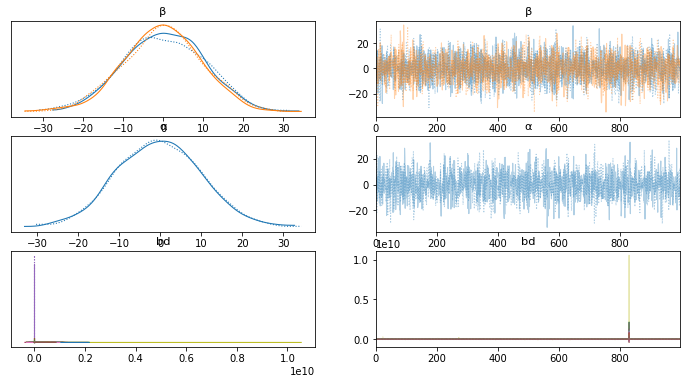

In [126]:
az.plot_trace(trace_0,var_names=['β','α','bd'])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1459) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26c7490610>,
      dtype=object)

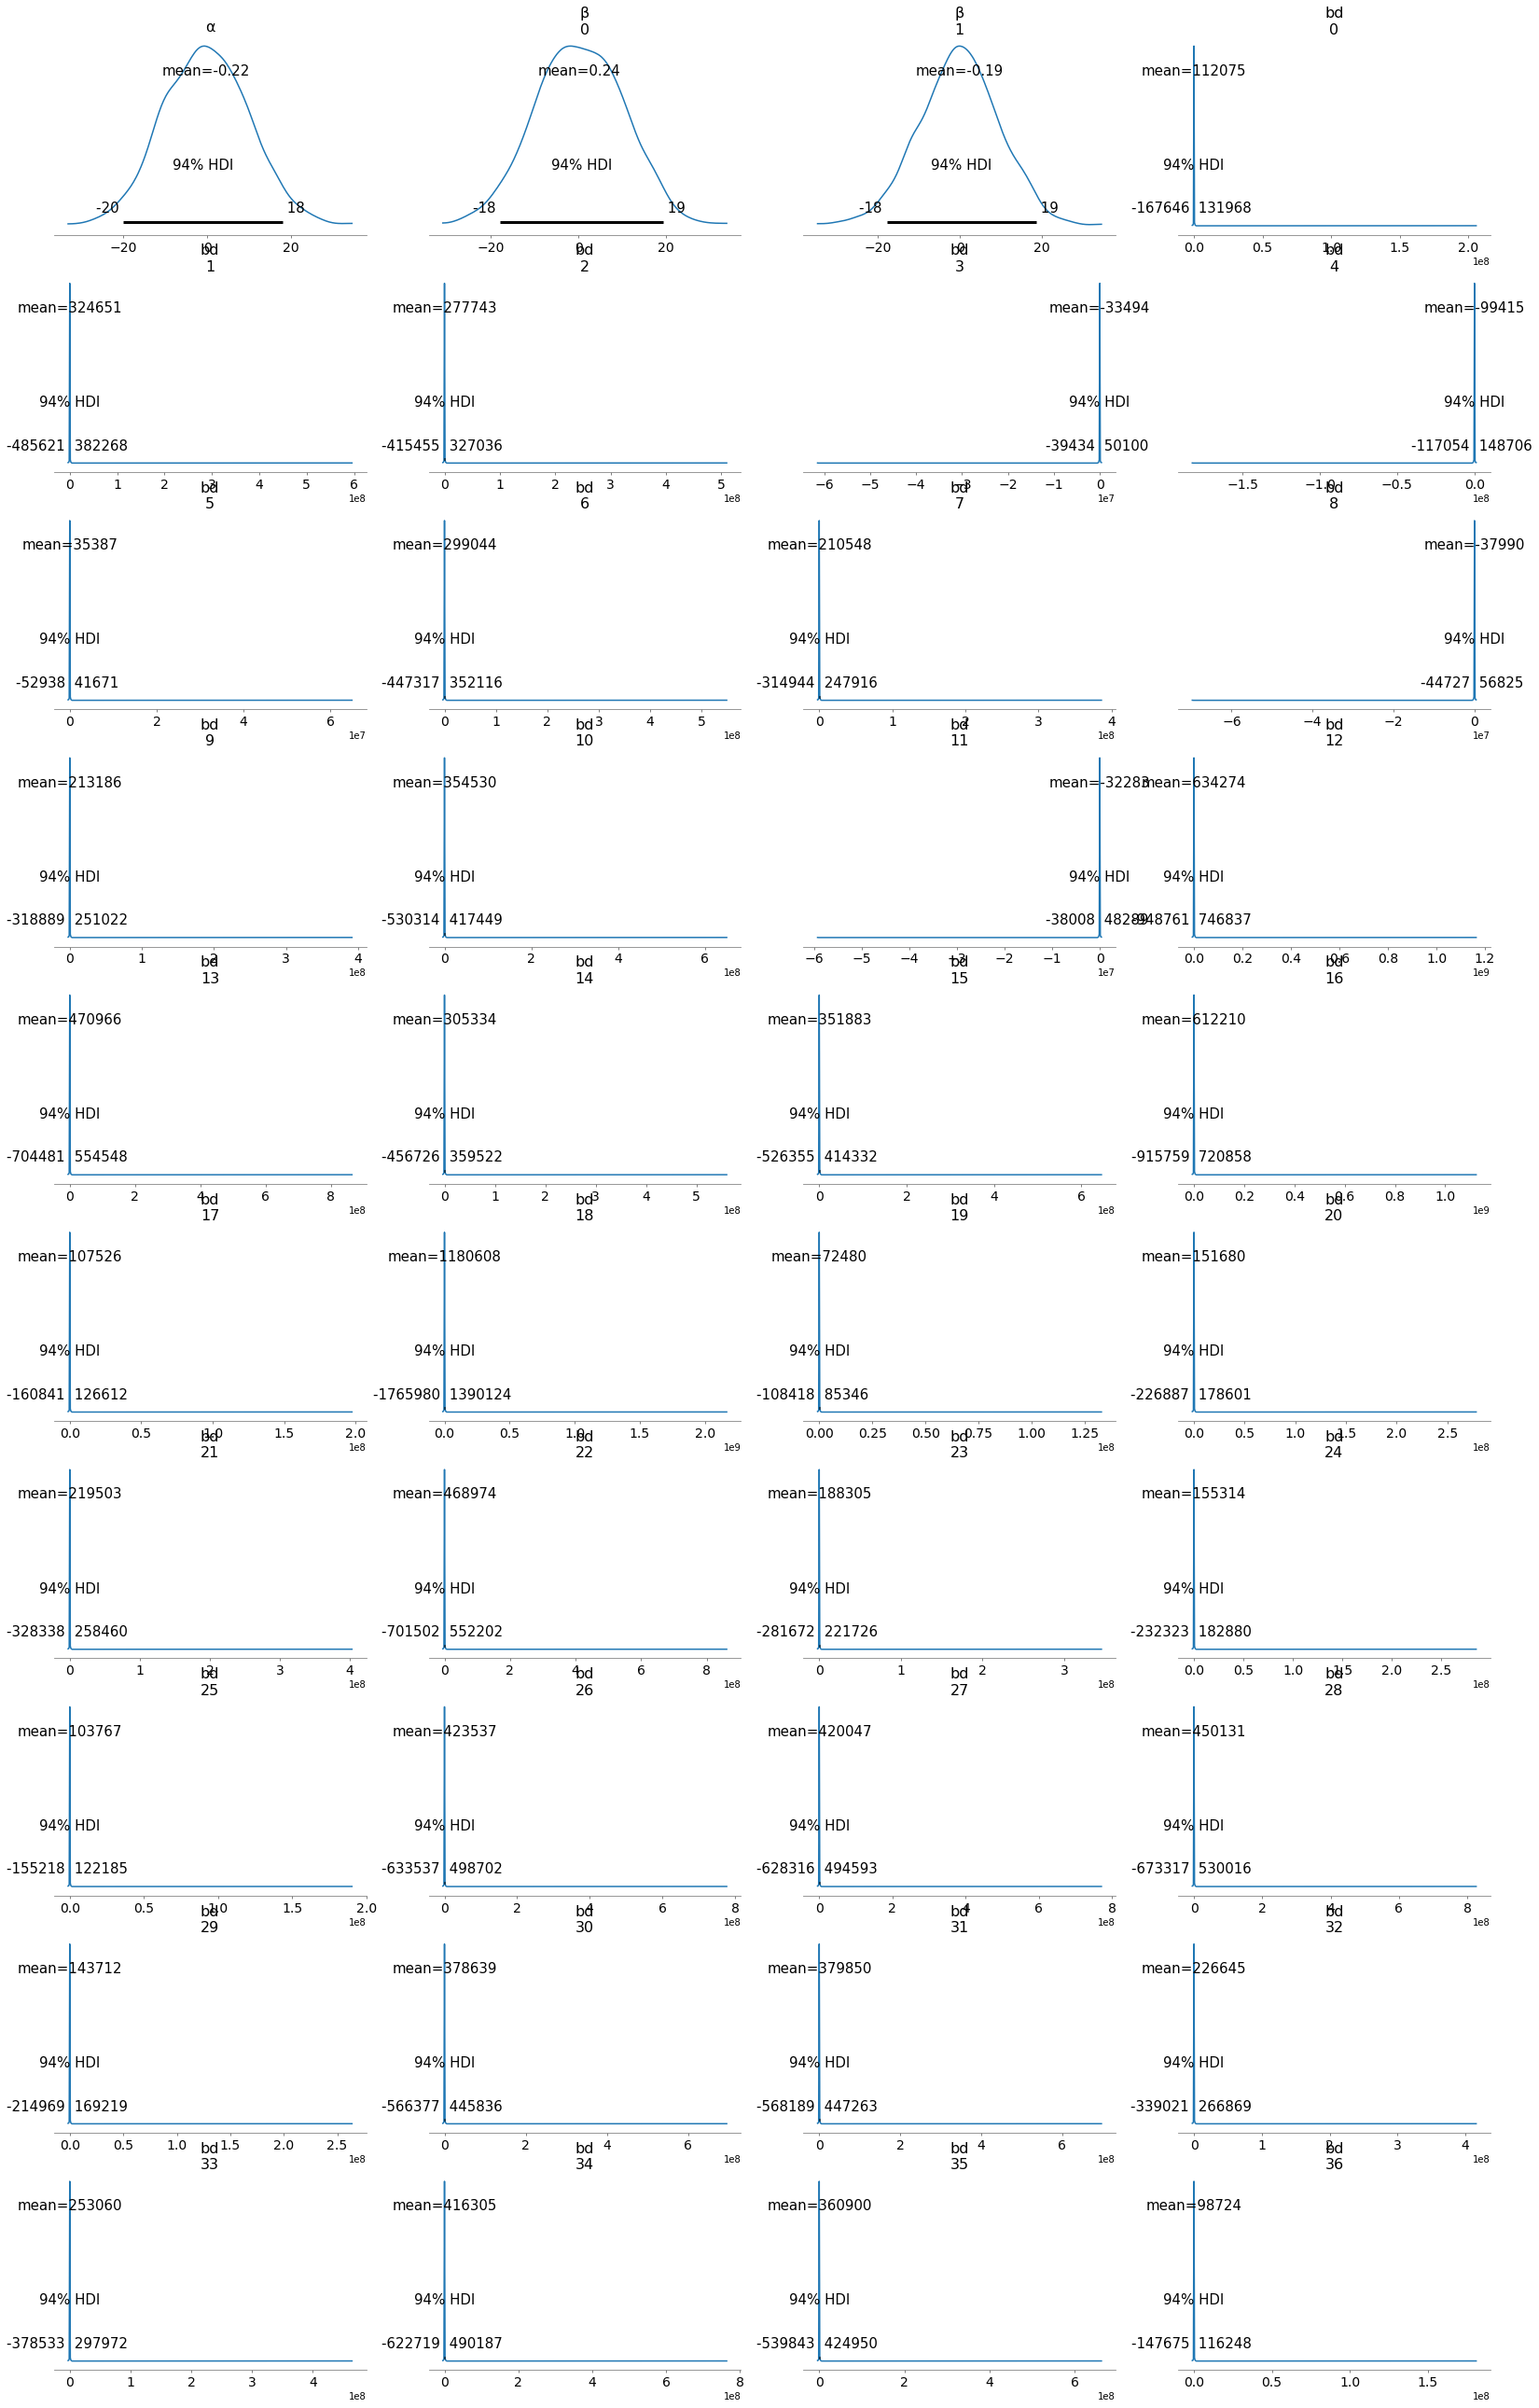

In [127]:
az.plot_posterior(trace_0)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


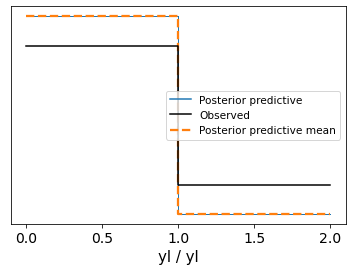

In [128]:
prior_predictive = pm.sample_prior_predictive(model=model_0)

posterior_predictive = pm.sample_posterior_predictive(model=model_0,trace=trace_0)
dataset = az.from_pymc3(trace=trace_0, posterior_predictive=posterior_predictive,prior=prior_predictive)
az.plot_ppc(dataset);


In [129]:
X_shared.set_value(x_c_test)
with model_0:
  #pm.set_data({'x': x_c_test})
  y_pred = pm.sample_posterior_predictive(trace_0)

In [130]:
y_pred

{'yl': array([[[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]]])}

In [131]:
predictions=y_pred['yl'].mean(axis=0)
predictions

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 

In [134]:
predictions[0]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

In [135]:
predictions2=[]
for i in predictions[0]:
  if i>0:
    predictions2.append(1)
  else:
    predictions2.append(0)
predictions2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [136]:
z=0
o=0
for i in predictions2:
  if i==0:
    z=z+1
  elif i==1:
    o=o+1
print(z)
print(o)


779
5


In [137]:
len(predictions2)

784

In [138]:
accuracy=accuracy_score(y_0_test,predictions2)*100
precision=precision_score(y_0_test,predictions2)*100
recall=recall_score(y_0_test,predictions2)*100
f1score=f1_score(y_0_test,predictions2)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  84.43877551020408
Precision =  0.0
Recall =  0.0
F1 score =  0.0


In [139]:
def tp_fp(y_pred, th):
    y_pred1=[]
    #y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), dtype='category')
    y_pred=list(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>=th:
            y_pred1.append(1)
        else:
            y_pred1.append(0)
    tn,fp,fn,tp=confusion_matrix(y_0_test, y_pred1).ravel()
    return tp,fp

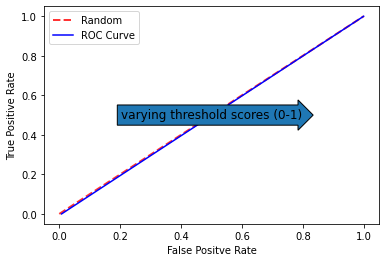

0.0

In [140]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

tpr=[]
fpr=[]

positives = np.sum(y_0_test==1)
negatives = np.sum(y_0_test==0)

for t in thresholds:
    tp, fp=tp_fp(predictions2,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Checking AUC score

auc_score = roc_auc_score(y_0_test, predictions2)
auc_score

tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
#print('At index:',index)
#print('geometric mean is: ',gmean[index])

# optimal threshold
thresholds[index] # threshold of 0.2 will give us the highest mean and best tpr to fpr ratio





In [143]:
y_pred=list(predictions2)
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [142]:
accuracy=accuracy_score(y_0_test,y_pred1)*100
precision=precision_score(y_0_test,y_pred1)*100
recall=recall_score(y_0_test,y_pred1)*100
f1score=f1_score(y_0_test,y_pred1)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  84.43877551020408
Precision =  0.0
Recall =  0.0
F1 score =  0.0


Softmax regression gave the worst possible result. Let's balance the classes using oversampling technique.

In [144]:
X=df.drop(['Response'],axis=1)
Y=df['Response']

In [145]:
from imblearn.over_sampling import RandomOverSampler
sample = RandomOverSampler(random_state=0)
x, y=sample.fit_resample(X,Y)

In [161]:
y

3812

In [162]:
x.shape

(3812, 28)

In [168]:

y_0 = pd.Categorical(y).codes
x_n = ['Income','Recency']
x_0 = x[x_n].values
x_c = x_0 - x_0.mean()

In [169]:
x_c_train, x_c_test, y_0_train, y_0_test=train_test_split(x_c,y_0,test_size=0.35,stratify=y_0)

In [170]:
import theano
X_shared = theano.shared(x_c_train)

In [171]:
import theano.tensor as tt
with pm.Model() as model_0:
  
  α = pm.Normal('α', mu=0, sd=10)
  β = pm.Normal('β', mu=0, sd=10,shape=len(x_n))
  μ = α + pm.math.dot(X_shared, β)
  θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
  bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * X_shared[:,0])
  #start=pm.find_MAP()
  step1=pm.Metropolis()
  yl = pm.Bernoulli('yl', p=θ, observed=y_0_train)
  trace_0 = pm.sample(1000,step=step1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.


In [172]:
az.summary(trace_0, var_names=['β','α'])


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β[0],0.411,10.554,-18.525,20.691,0.217,0.247,2372.0,1617.0,1.0
β[1],0.294,10.343,-19.906,18.024,0.200,0.238,2667.0,1509.0,1.0
α,0.053,9.962,-17.653,19.041,0.199,0.236,2500.0,1328.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26bc67c4d0>,
      dtype=object)

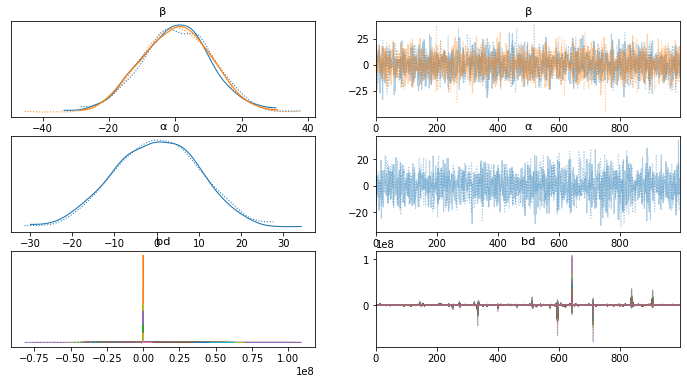

In [173]:
az.plot_trace(trace_0,var_names=['β','α','bd'])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (4957) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26b30a1a10>,
      dtype=object)

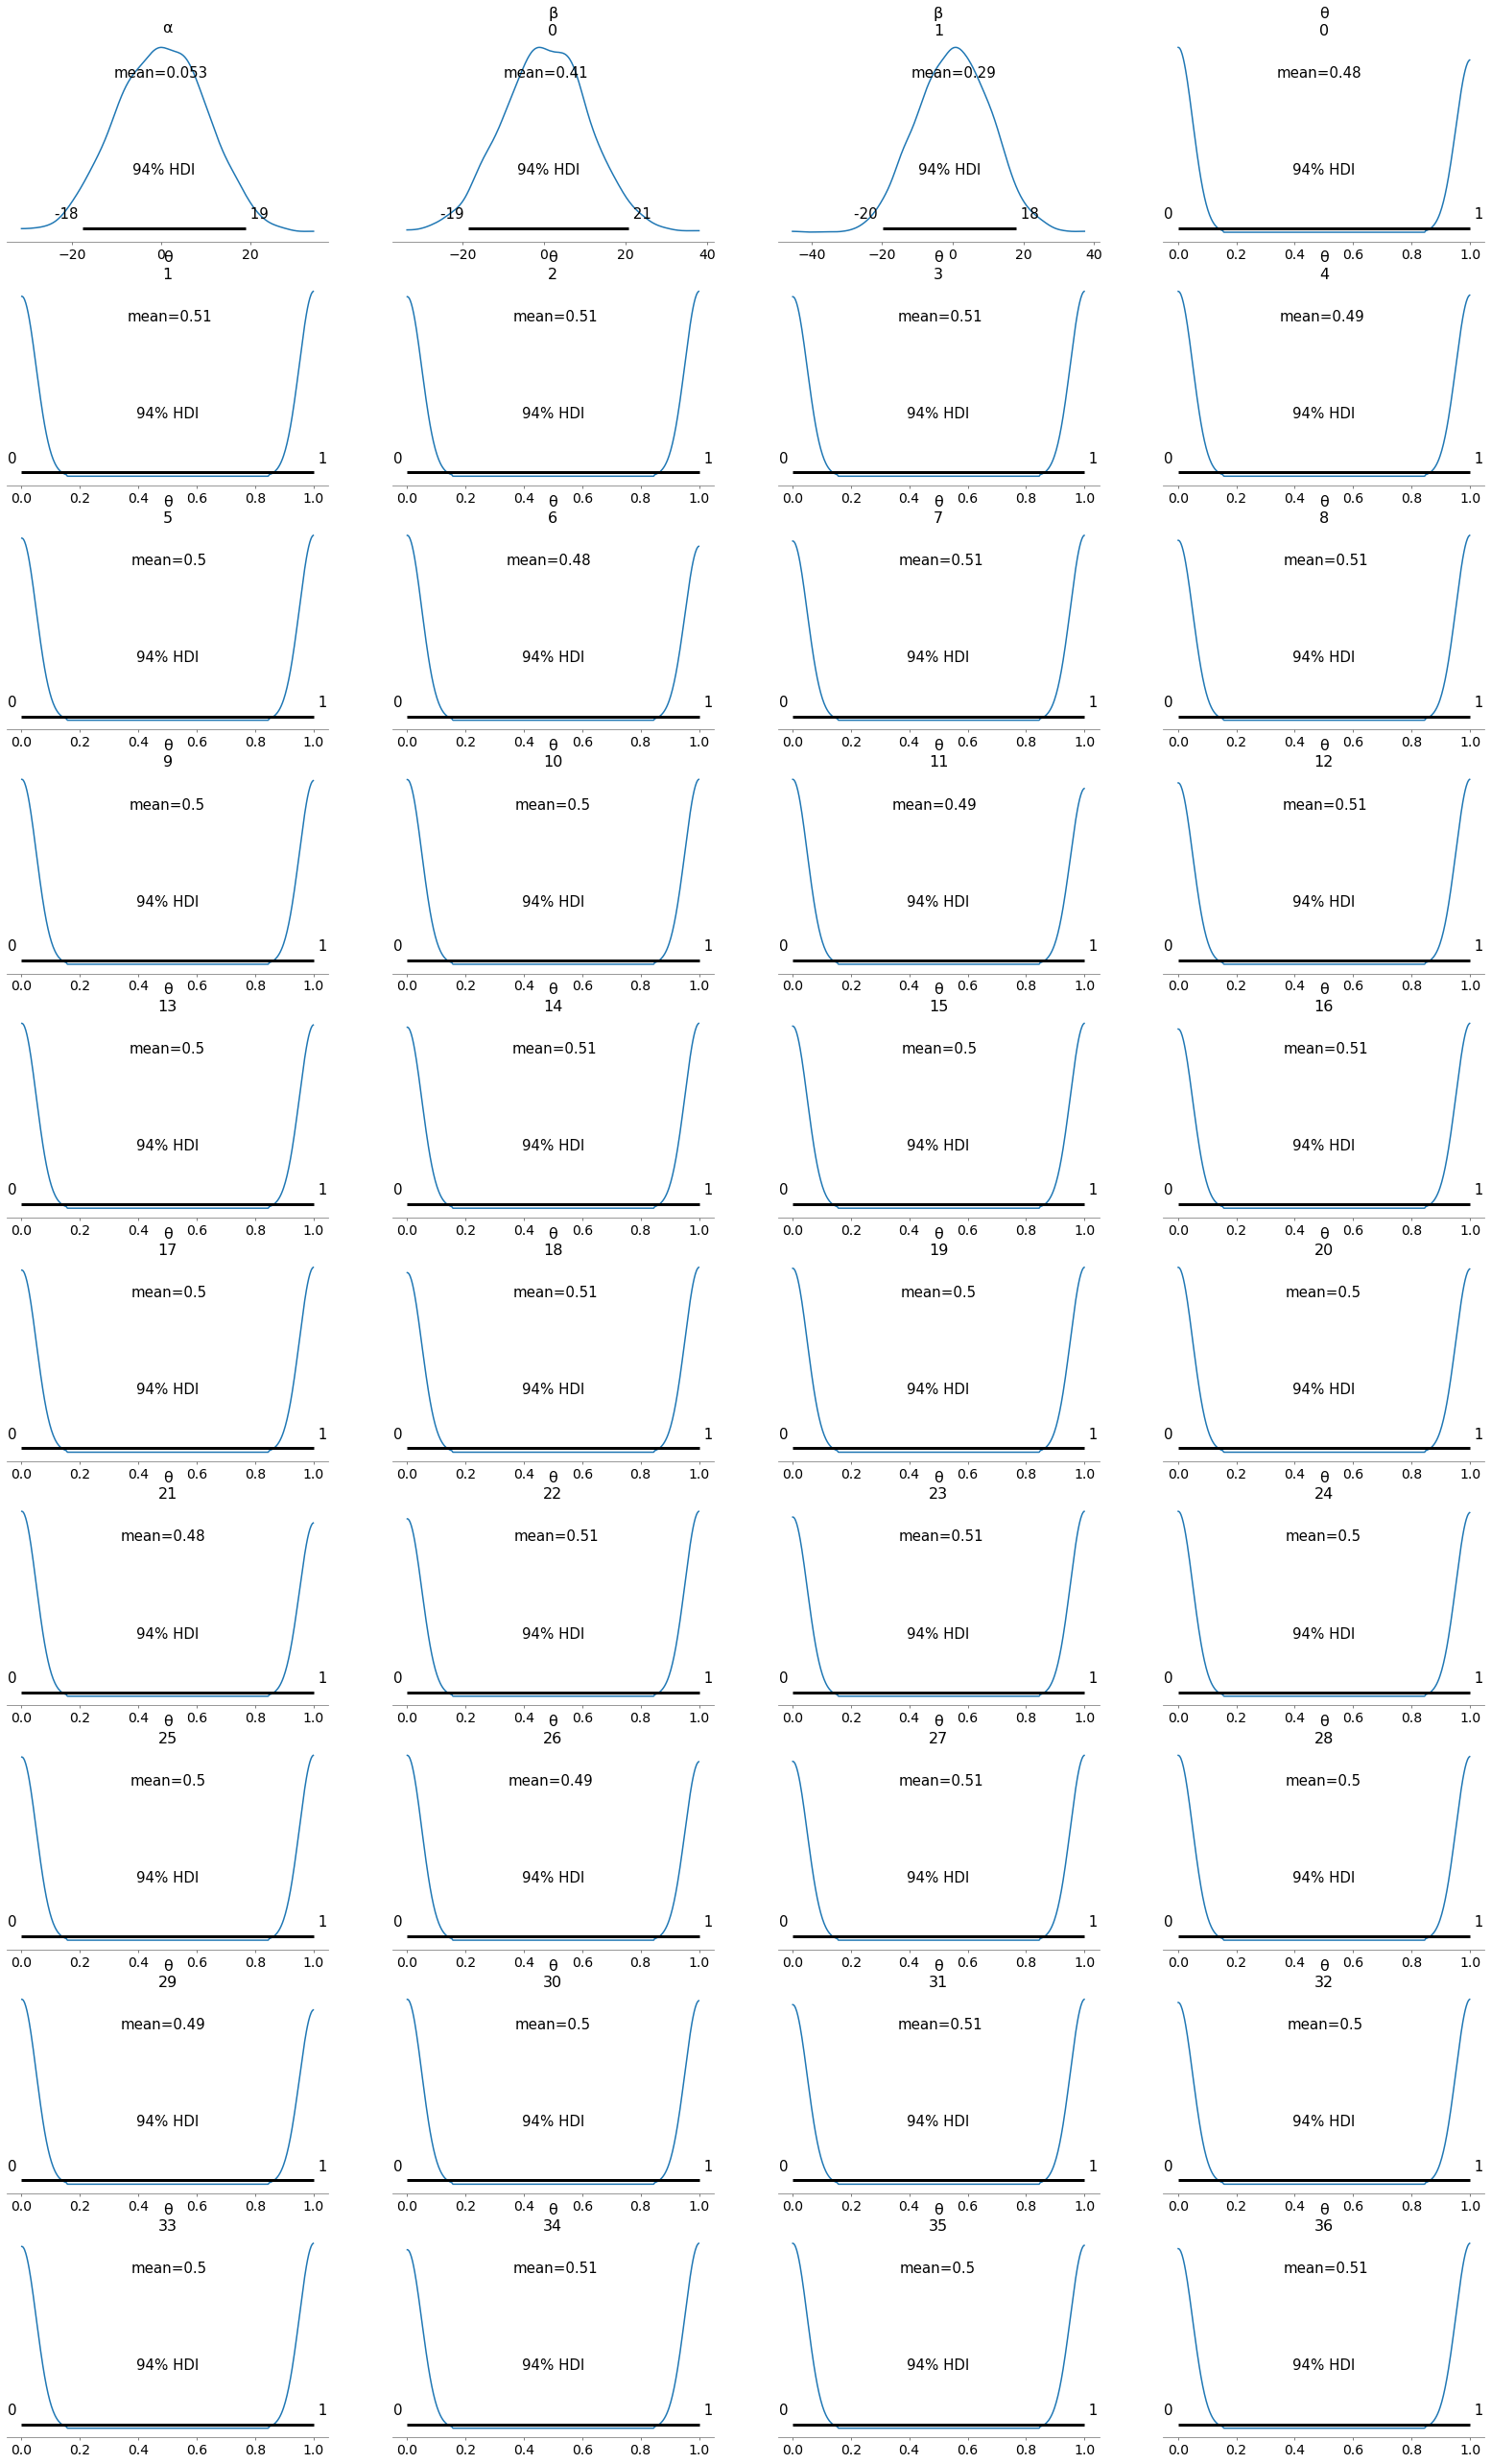

In [174]:
az.plot_posterior(trace_0)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


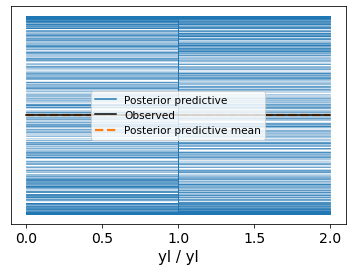

In [175]:
prior_predictive = pm.sample_prior_predictive(model=model_0)

posterior_predictive = pm.sample_posterior_predictive(model=model_0,trace=trace_0)
dataset = az.from_pymc3(trace=trace_0, posterior_predictive=posterior_predictive,prior=prior_predictive)
az.plot_ppc(dataset);


In [176]:
X_shared.set_value(x_c_test)
with model_0:
  #pm.set_data({'x': x_c_test})
  y_pred = pm.sample_posterior_predictive(trace_0)

In [177]:
y_pred

{'yl': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1]])}

In [178]:
predictions=y_pred['yl'].mean(axis=0)
predictions

array([0.477 , 0.491 , 0.502 , ..., 0.505 , 0.5085, 0.491 ])

In [182]:
predictions2=[]
for i in predictions:
  if i>0.5:
    predictions2.append(1)
  else:
    predictions2.append(0)
predictions2

[0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


In [183]:
z=0
o=0
for i in predictions2:
  if i==0:
    z=z+1
  elif i==1:
    o=o+1
print(z)
print(o)


355
980


In [184]:
len(predictions2)

1335

In [185]:
accuracy=accuracy_score(y_0_test,predictions2)*100
precision=precision_score(y_0_test,predictions2)*100
recall=recall_score(y_0_test,predictions2)*100
f1score=f1_score(y_0_test,predictions2)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  54.00749063670413
Precision =  52.755102040816325
Recall =  77.39520958083833
F1 score =  62.74271844660194


In [186]:
def tp_fp(y_pred, th):
    y_pred1=[]
    #y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), dtype='category')
    y_pred=list(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>=th:
            y_pred1.append(1)
        else:
            y_pred1.append(0)
    tn,fp,fn,tp=confusion_matrix(y_0_test, y_pred1).ravel()
    return tp,fp

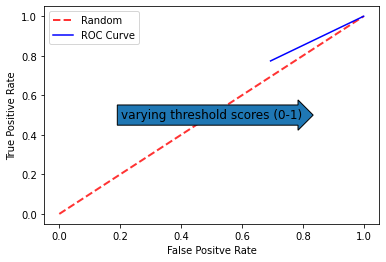

0.010101010101010102

In [187]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

tpr=[]
fpr=[]

positives = np.sum(y_0_test==1)
negatives = np.sum(y_0_test==0)

for t in thresholds:
    tp, fp=tp_fp(predictions2,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Checking AUC score

auc_score = roc_auc_score(y_0_test, predictions2)
auc_score

tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
#print('At index:',index)
#print('geometric mean is: ',gmean[index])

# optimal threshold
thresholds[index] # threshold of 0.2 will give us the highest mean and best tpr to fpr ratio





In [188]:
y_pred=list(predictions2)
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.8:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [189]:
accuracy=accuracy_score(y_0_test,y_pred1)*100
precision=precision_score(y_0_test,y_pred1)*100
recall=recall_score(y_0_test,y_pred1)*100
f1score=f1_score(y_0_test,y_pred1)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  54.00749063670413
Precision =  52.755102040816325
Recall =  77.39520958083833
F1 score =  62.74271844660194
